In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['professionals.csv', 'tag_users.csv', 'students.csv', 'tag_questions.csv', 'groups.csv', 'emails.csv', 'group_memberships.csv', 'answers.csv', 'question_scores.csv', 'answer_scores.csv', 'comments.csv', 'matches.csv', 'tags.csv', 'questions.csv', 'school_memberships.csv']


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from plotly.offline import init_notebook_mode, iplot
from bokeh.plotting import figure, show, output_file, output_notebook
from bokeh.palettes import Spectral11, colorblind, Inferno, BuGn, brewer
import plotly.figure_factory as ff
from bokeh.models import HoverTool, value, LabelSet, Legend, ColumnDataSource,LinearColorMapper,BasicTicker, PrintfTickFormatter, ColorBar
output_notebook()

Loading BokehJS ...

In [3]:
## Load dataset

In [4]:
answers=pd.read_csv('../input/answers.csv')
comments = pd.read_csv('../input/comments.csv',parse_dates = ['comments_date_added'])
emails = pd.read_csv("../input/emails.csv",parse_dates = ['emails_date_sent'])
group_memberships = pd.read_csv('../input/group_memberships.csv')
groups = pd.read_csv('../input/groups.csv')
matches = pd.read_csv('../input/matches.csv')
professionals = pd.read_csv("../input/professionals.csv" ,parse_dates = ['professionals_date_joined'])
questions = pd.read_csv('../input/questions.csv')
school_memberships = pd.read_csv('../input/school_memberships.csv')
students = pd.read_csv('../input/students.csv',parse_dates = ['students_date_joined'])
tag_questions = pd.read_csv("../input/tag_questions.csv")
tag_users = pd.read_csv('../input/tag_users.csv')
tags = pd.read_csv('../input/tags.csv')

Take a look at data

In [5]:
answers.head(2)

,answers_id,answers_author_id,answers_question_id,answers_date_added,answers_body
0,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14 UTC+0000,<p>Hi!</p>\n<p>You are asking a very interesti...
1,ada720538c014e9b8a6dceed09385ee3,2aa47af241bf42a4b874c453f0381bd4,eb80205482e4424cad8f16bc25aa2d9c,2018-05-01 14:19:08 UTC+0000,<p>Hi. I joined the Army after I attended coll...


In [6]:
comments.head(2)

,comments_id,comments_author_id,comments_parent_content_id,comments_date_added,comments_body
0,f30250d3c2ca489db1afa9b95d481e08,9fc88a7c3323466dbb35798264c7d497,b476f9c6d9cd4c50a7bacdd90edd015a,2019-01-31 23:39:40,"First, you speak to recruiters. They are train..."
1,ca9bfc4ba9464ea383a8b080301ad72c,de2415064b9b445c8717425ed70fd99a,ef4b6ae24d1f4c3b977731e8189c7fd7,2019-01-31 20:30:47,Most large universities offer study abroad pro...


In [7]:
emails.head(2)

,emails_id,emails_recipient_id,emails_date_sent,emails_frequency_level
0,2337714,0c673e046d824ec0ad0ebe012a0673e4,2018-12-07 01:05:40,email_notification_daily
1,2336077,0c673e046d824ec0ad0ebe012a0673e4,2018-12-06 01:14:15,email_notification_daily


In [8]:
group_memberships.head(2)

,group_memberships_group_id,group_memberships_user_id
0,eabbdf4029734c848a9da20779637d03,9a5aead62c344207b2624dba90985dc5
1,eabbdf4029734c848a9da20779637d03,ea7122da1c7b4244a2184a4f9f944053


In [9]:
questions.head(2)

,questions_id,questions_author_id,questions_date_added,questions_title,questions_body
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26 UTC+0000,Teacher career question,What is a maths teacher? what is a ma...
1,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25 UTC+0000,I want to become an army officer. What can I d...,I am Priyanka from Bangalore . Now am in 10th ...


In [10]:
school_memberships.head(2)

,school_memberships_school_id,school_memberships_user_id
0,197406,23dce13ca6164a73aec7a3cd56a4884d
1,197398,23dce13ca6164a73aec7a3cd56a4884d


In [11]:
students.head(2)

,students_id,students_location,students_date_joined
0,12a89e96755a4dba83ff03e03043d9c0,NaN,2011-12-16 14:19:24
1,e37a5990fe354c60be5e87376b08d5e3,NaN,2011-12-27 03:02:44


In [12]:
tag_questions.head(2)

,tag_questions_tag_id,tag_questions_question_id
0,28930,cb43ebee01364c68ac61d347a393ae39
1,28930,47f55e85ce944242a5a347ab85a8ffb4


In [13]:
tag_users.head(2)

,tag_users_tag_id,tag_users_user_id
0,593,c72ab38e073246e88da7e9a4ec7a4472
1,1642,8db519781ec24f2e8bdc67c2ac53f614


In [14]:
tags.head(2)

,tags_tag_id,tags_tag_name
0,27490,college
1,461,computer-science


Learn about Professionals


When did First Student join?

In [15]:
print('First Student joined at ',students.students_date_joined.min())
print('Latest Student joined from this Dataset',students.students_date_joined.max())

First Student joined at  2011-12-16 14:19:24
Latest Student joined from this Dataset 2019-01-31 23:13:23


In [16]:
def extract_date(df, column):
    
    df['year'] = df[column].apply(lambda x: x.year)
    df['month'] = df[column].apply(lambda x: x.month)
    df['day'] = df[column].apply(lambda x: x.day)

In [17]:
extract_date(professionals, 'professionals_date_joined')

In [18]:
professionals.head(3)

,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined,year,month,day
0,9ced4ce7519049c0944147afb75a8ce3,NaN,NaN,NaN,2011-10-05 20:35:19,2011,10,5
1,f718dcf6d2ec4cb0a52a9db59d7f9e67,NaN,NaN,NaN,2011-10-05 20:49:21,2011,10,5
2,0c673e046d824ec0ad0ebe012a0673e4,"New York, New York",NaN,NaN,2011-10-18 17:31:26,2011,10,18


In [19]:
year  = professionals.year.unique()
type(year)

numpy.ndarray

In [20]:
rev = -np.sort(-year)
rev

array([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011])

In [21]:
TOOLS = 'save,pan,box_zoom,reset,wheel_zoom,hover'
p = figure(title="Year-wise total number of professionals Count", y_axis_type="linear", plot_height = 400,
           tools = TOOLS, plot_width = 800)
p.xaxis.axis_label = 'Year'
p.yaxis.axis_label = 'Total Count'
p.line(rev, professionals.year.value_counts() ,line_color="purple", line_width = 3)
p.select_one(HoverTool).tooltips = [
    ('year', '@x'),
    ('Number of Count', '@y'),
]

output_file("line_chart.html", title="Line Chart")
show(p)

## Where are they from?

In [22]:
professionals = professionals.dropna()

In [23]:
top_location = professionals.professionals_location.value_counts().head(12)

Text(0.5, 0, 'Records')

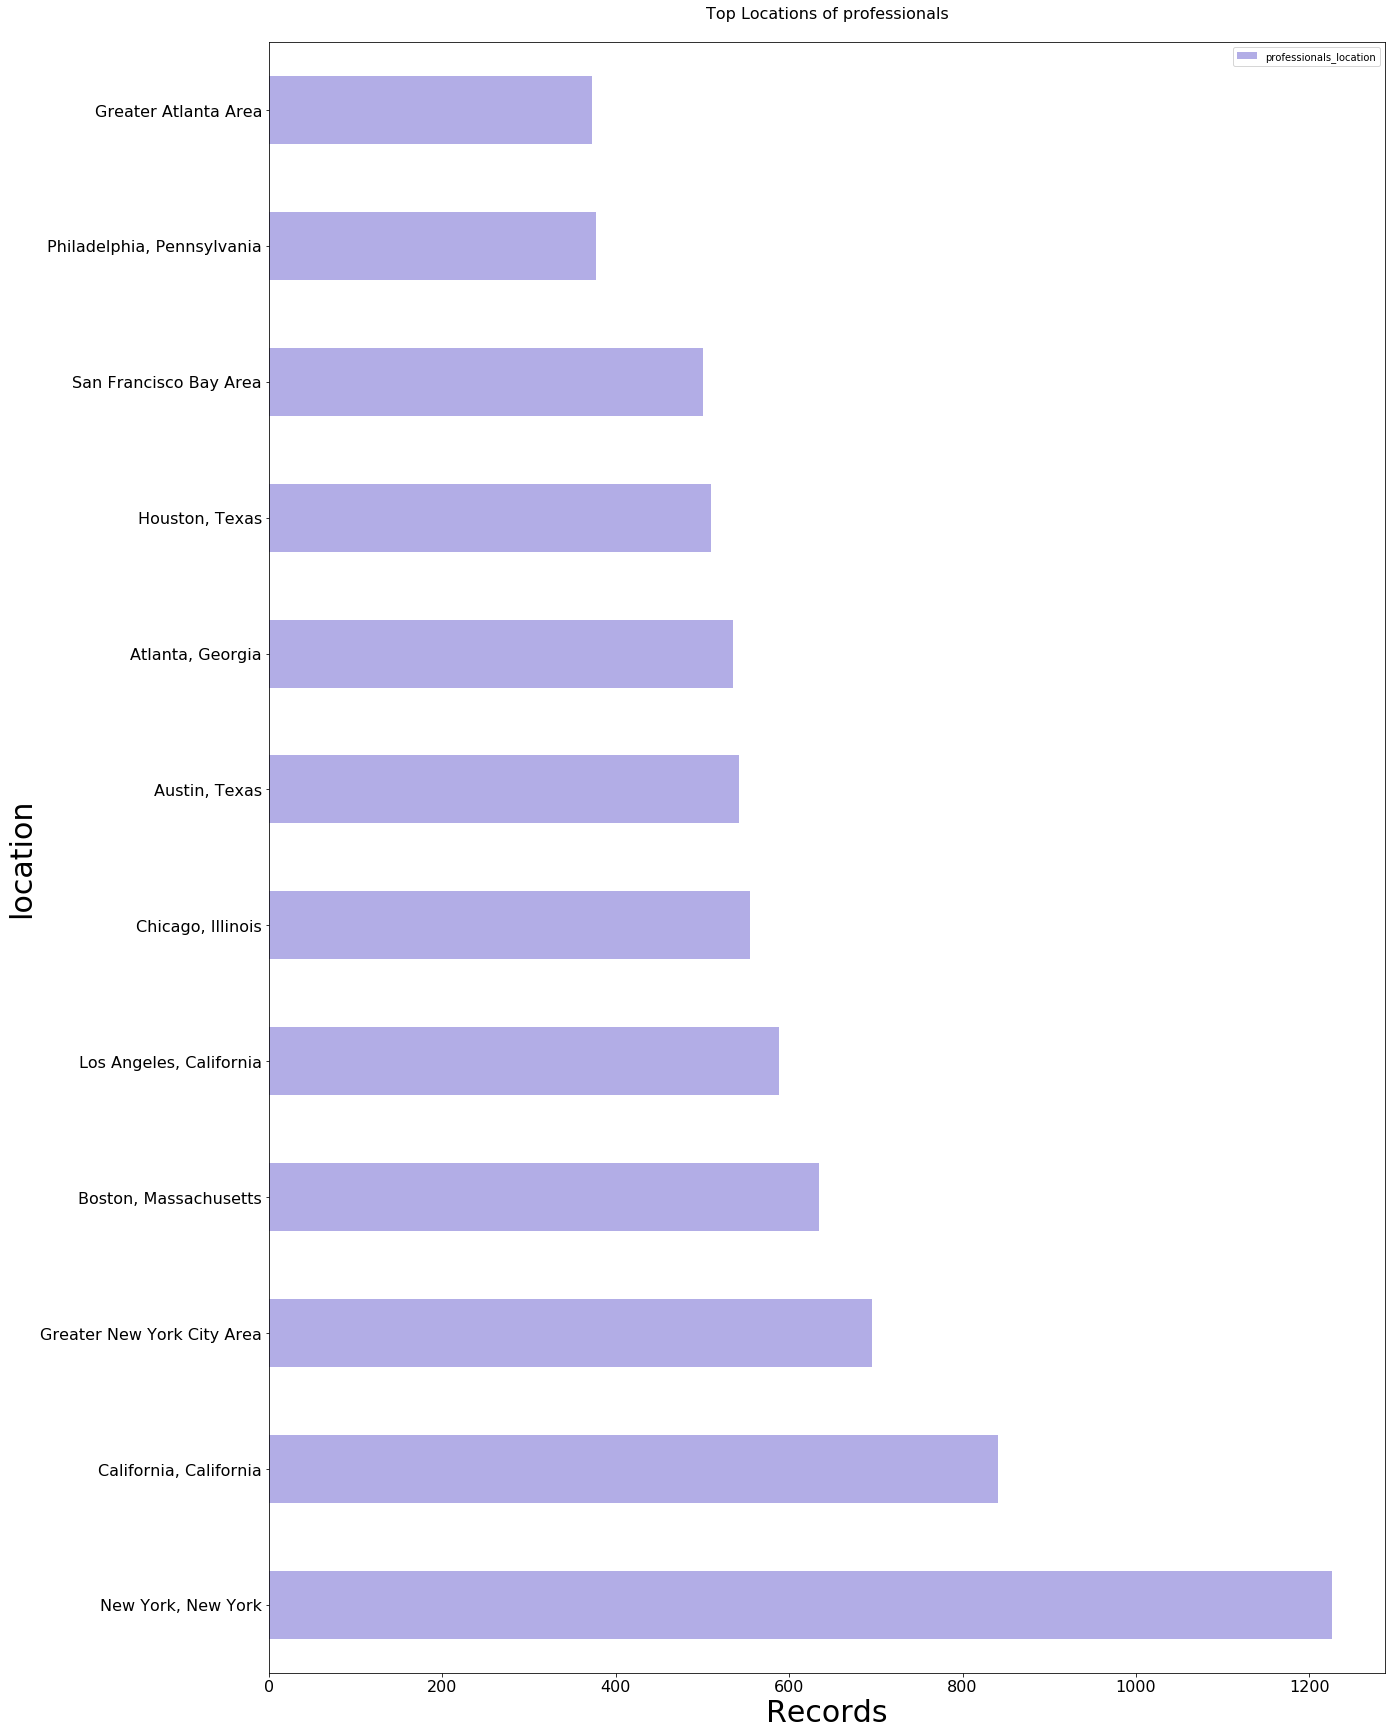

In [24]:
top_location.plot.barh(figsize=(20,30),legend=True,fontsize='16', color=['#b2ade6'])
plt.title('Top Locations of professionals\n', fontsize='16')
plt.ylabel('location', fontsize='30')
plt.xlabel('Records', fontsize='30')

## Top industries

In [25]:
industries = professionals['professionals_industry'].value_counts().head(12)

Text(0.5, 0, 'Records')

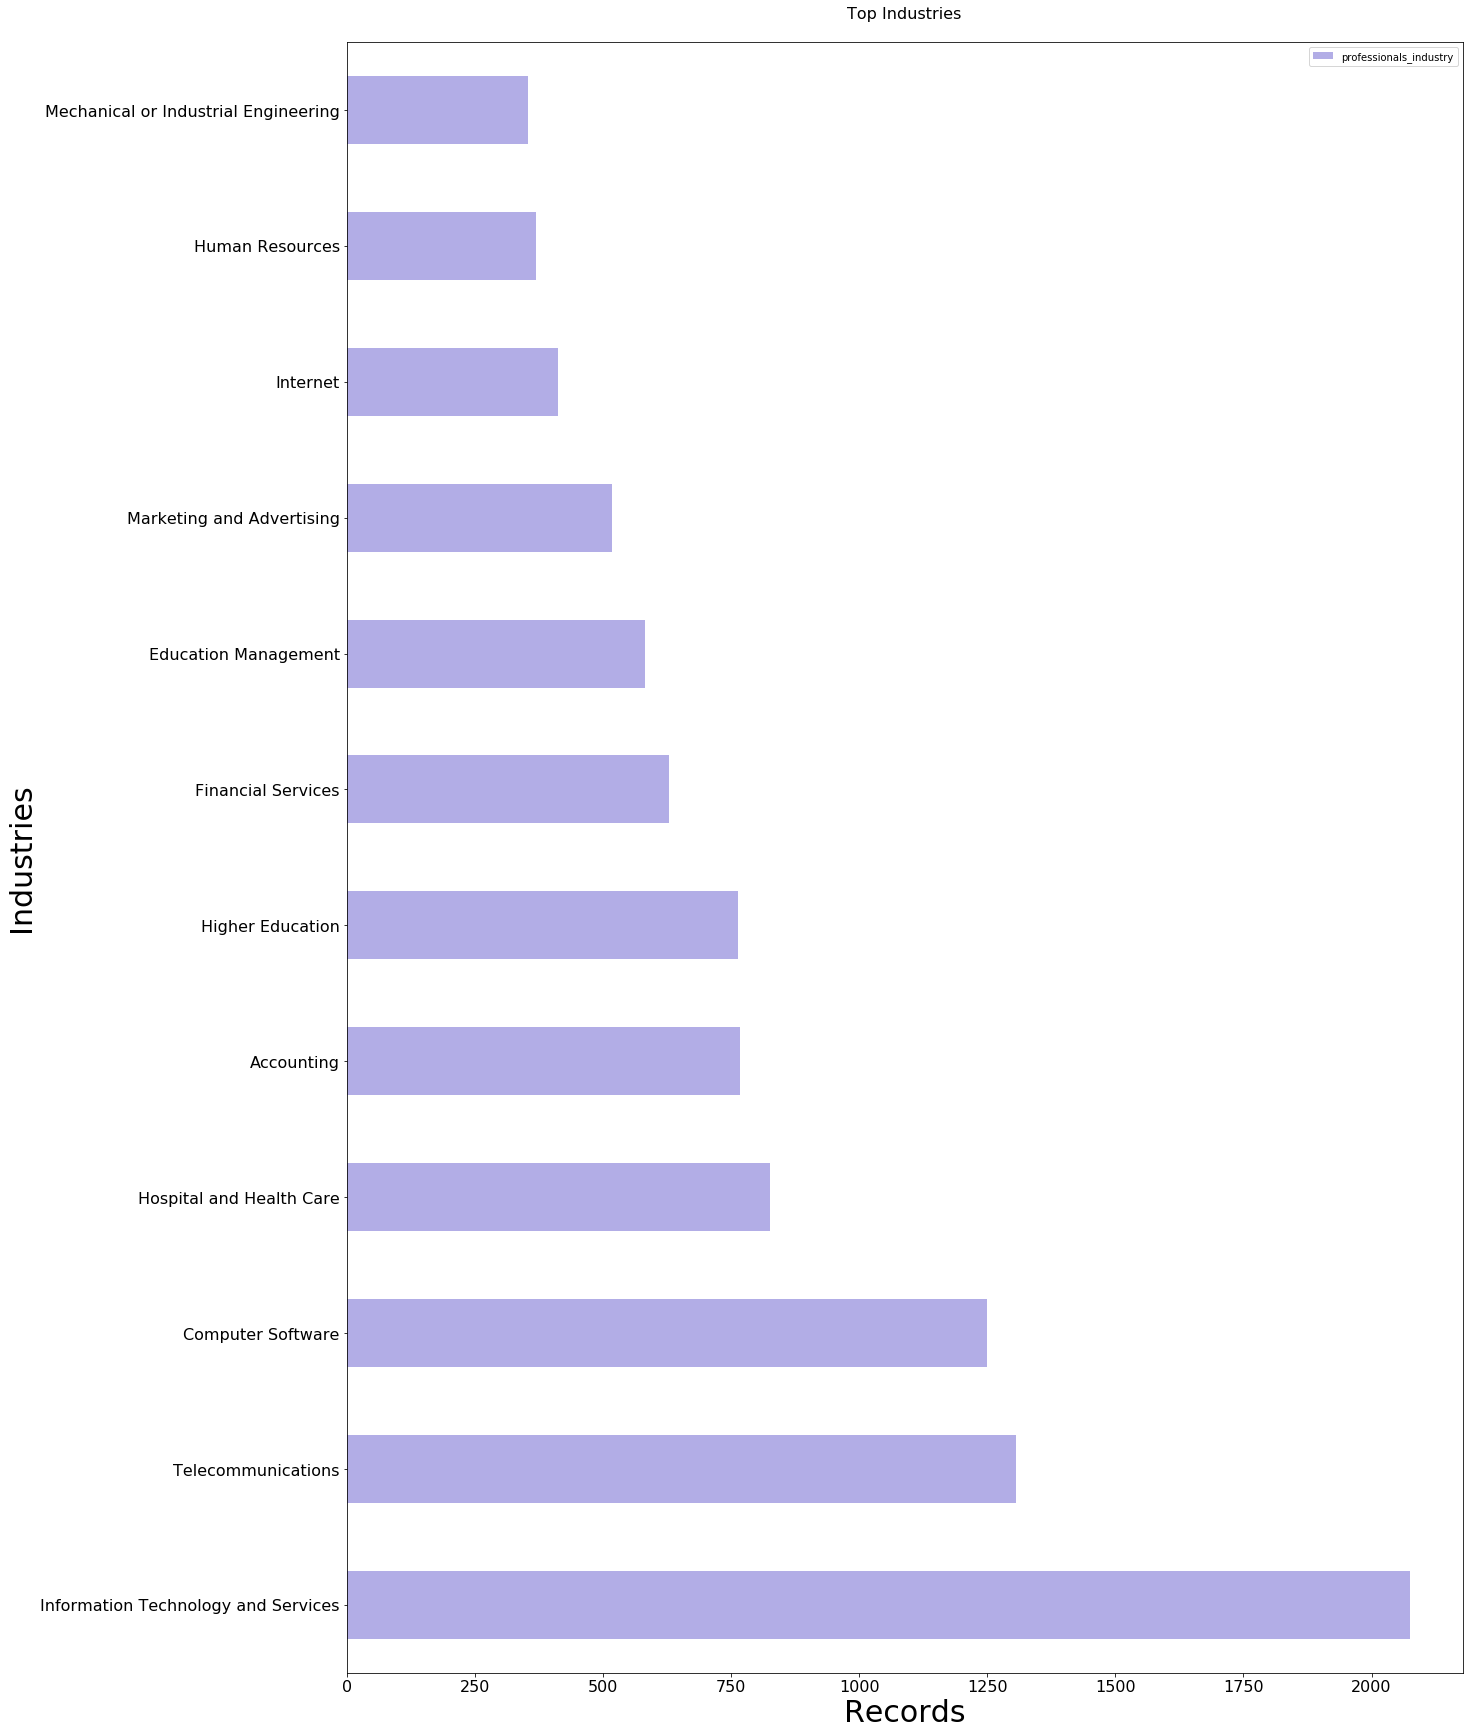

In [26]:
industries.plot.barh(figsize=(20,30),legend=True,fontsize='16', color=['#b2ade6'])
plt.title('Top Industries\n', fontsize='16')
plt.ylabel('Industries', fontsize='30')
plt.xlabel('Records', fontsize='30')

## Top headlines

In [27]:
headlines = professionals['professionals_headline'].value_counts().head(12)

Text(0.5, 0, 'Records')

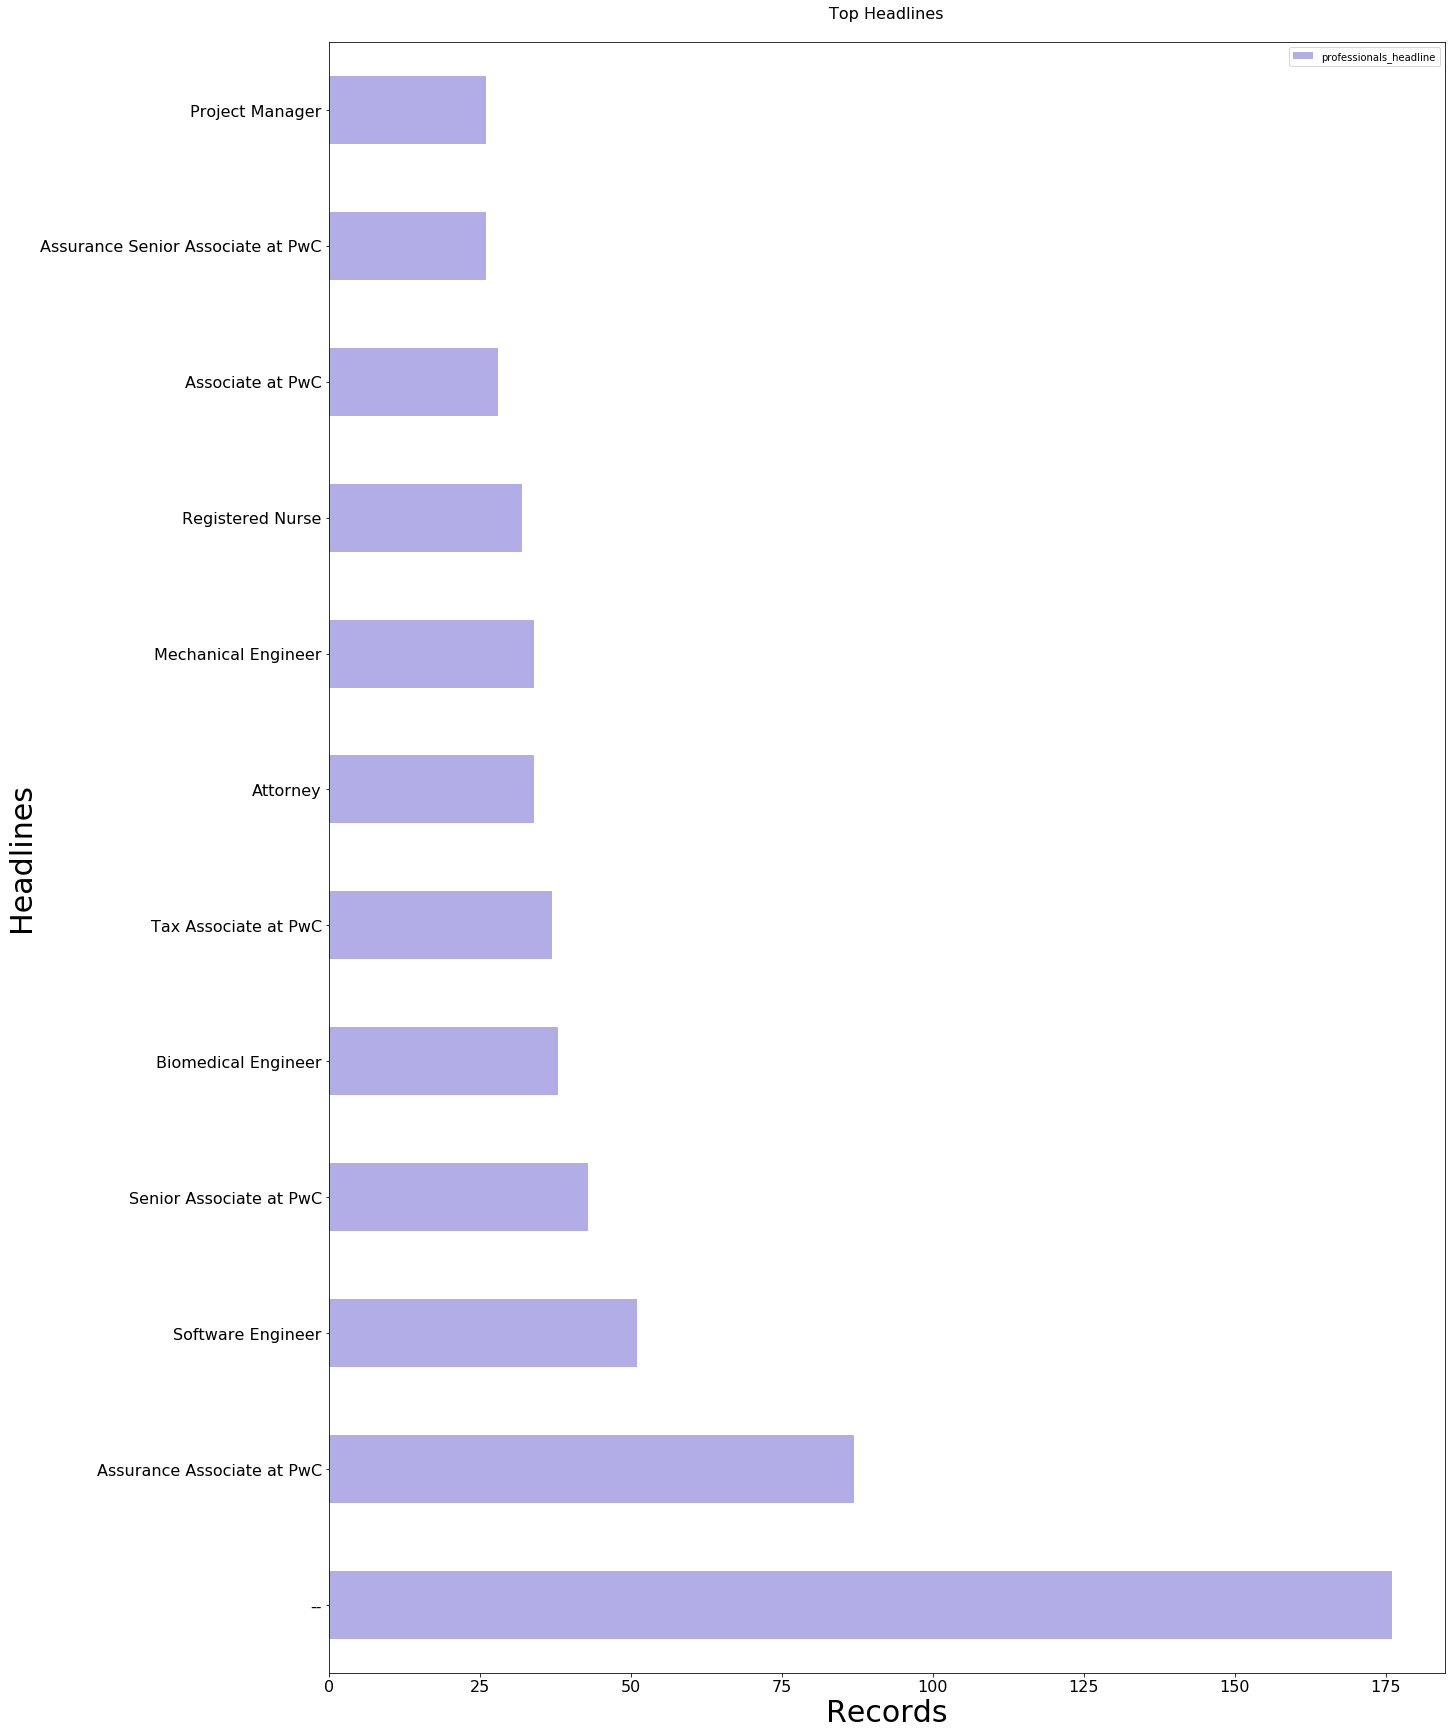

In [28]:
headlines.plot.barh(figsize=(20,30),legend=True,fontsize='16', color=['#b2ade6'])
plt.title('Top Headlines\n', fontsize='16')
plt.ylabel('Headlines', fontsize='30')
plt.xlabel('Records', fontsize='30')

## WordCloud of Headlines

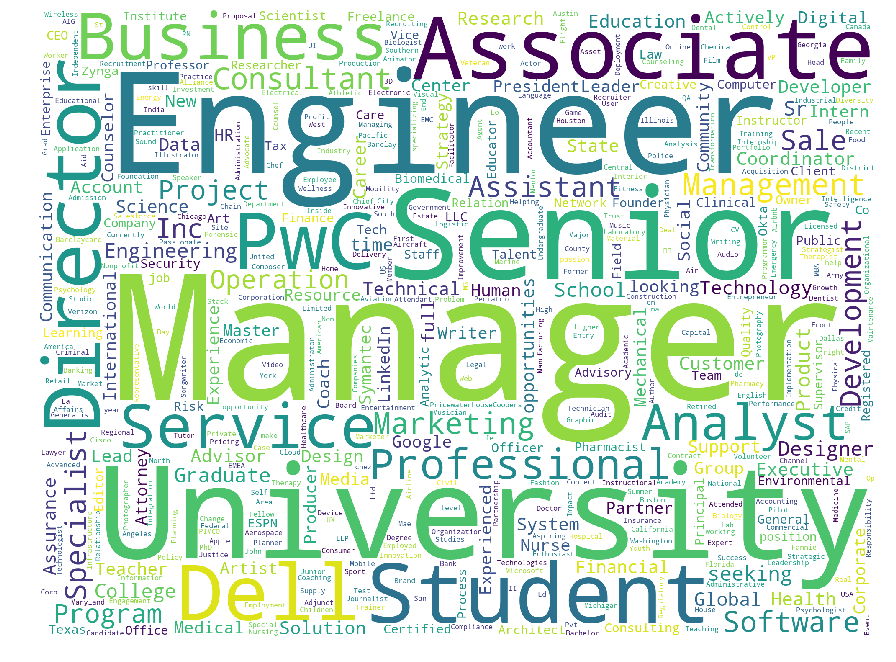

In [29]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
words = ' '.join(professionals['professionals_headline'])
wordcloud = WordCloud(stopwords=STOPWORDS,max_words=500,
                      background_color='white',min_font_size=6,
                      width=2000,collocations=False,
                      height=1500
                     ).generate(words)
plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# 2. Emails

In [30]:
extract_date(emails, 'emails_date_sent')

Text(0, 0.5, 'Count')

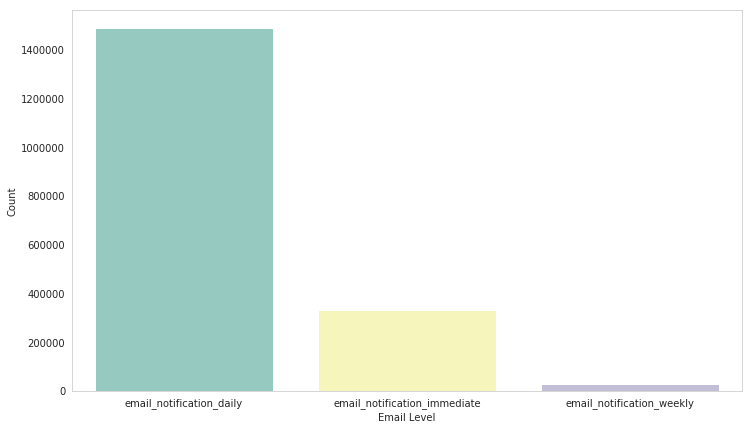

In [31]:
fig = plt.figure(figsize=(12, 7))
sns.set_style("whitegrid", {'axes.grid' : False})
sns.countplot(emails['emails_frequency_level'],palette="Set3")
plt.xlabel('Email Level')
plt.ylabel('Count')

In [32]:
emailyear  = emails.year.unique()
emailrev = -np.sort(-emailyear)
emailrev

array([2019, 2018, 2017, 2016, 2015, 2014, 2013])

In [33]:
TOOLS = 'save,pan,box_zoom,reset,wheel_zoom,hover'
p = figure(title="Year-wise total number of Email Count", y_axis_type="linear", plot_height = 400,
           tools = TOOLS, plot_width = 800)
p.xaxis.axis_label = 'Year'
p.yaxis.axis_label = 'Total Count'
p.line(emailrev, emails.year.value_counts() ,line_color="purple", line_width = 3)
p.select_one(HoverTool).tooltips = [
    ('year', '@x'),
    ('Number of Email Count', '@y'),
]

output_file("line_chart.html", title="Line Chart")
show(p)

In [34]:
extract_date(students, 'students_date_joined')  

In [35]:
students.isnull().sum()
students  = students.dropna()
students.isnull().sum()

students_id             0
students_location       0
students_date_joined    0
year                    0
month                   0
day                     0
dtype: int64

In [36]:
## Top Student location

Text(0.5, 0, 'Records')

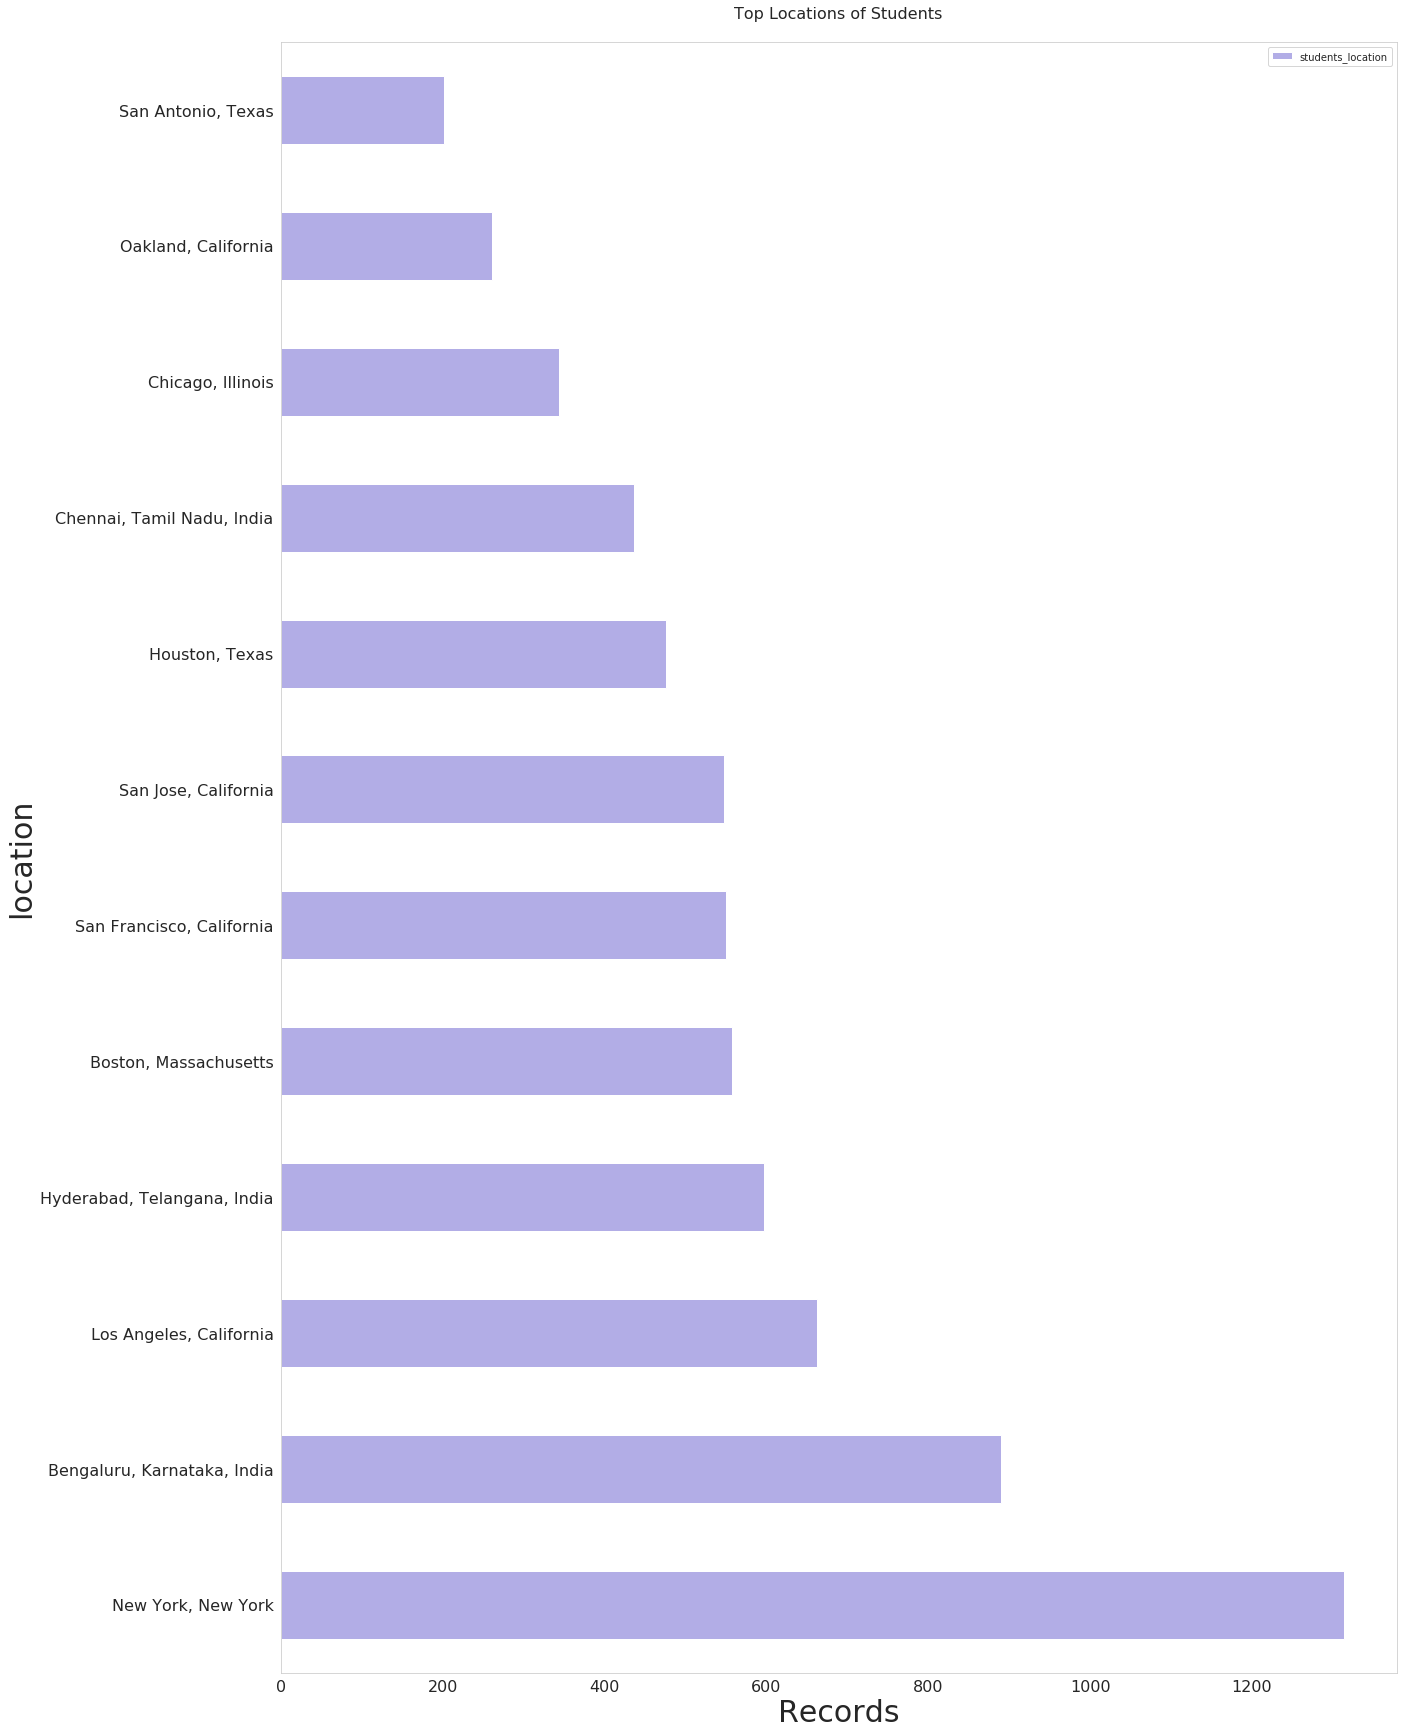

In [37]:
top_Student_location = students.students_location.value_counts().head(12)
top_Student_location.plot.barh(figsize=(20,30),legend=True,fontsize='16', color=['#b2ade6'])
plt.title('Top Locations of Students\n', fontsize='16')
plt.ylabel('location', fontsize='30')
plt.xlabel('Records', fontsize='30')

In [38]:
studentyear  =  students.year.unique()
studentrev = -np.sort(-studentyear)
studentrev

array([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012])

In [39]:
TOOLS = 'save,pan,box_zoom,reset,wheel_zoom,hover'
p = figure(title="Year-wise total number of Student Count", y_axis_type="linear", plot_height = 400,
           tools = TOOLS, plot_width = 800)
p.xaxis.axis_label = 'Year'
p.yaxis.axis_label = 'Total Count'
p.line(studentrev, students.year.value_counts() ,line_color="purple", line_width = 3)
p.select_one(HoverTool).tooltips = [
    ('year', '@x'),
    ('Number of Student Count', '@y'),
]

output_file("line_chart.html", title="Line Chart")
show(p)

Finding the Top tags?

Text(0, 0.5, 'Tags')

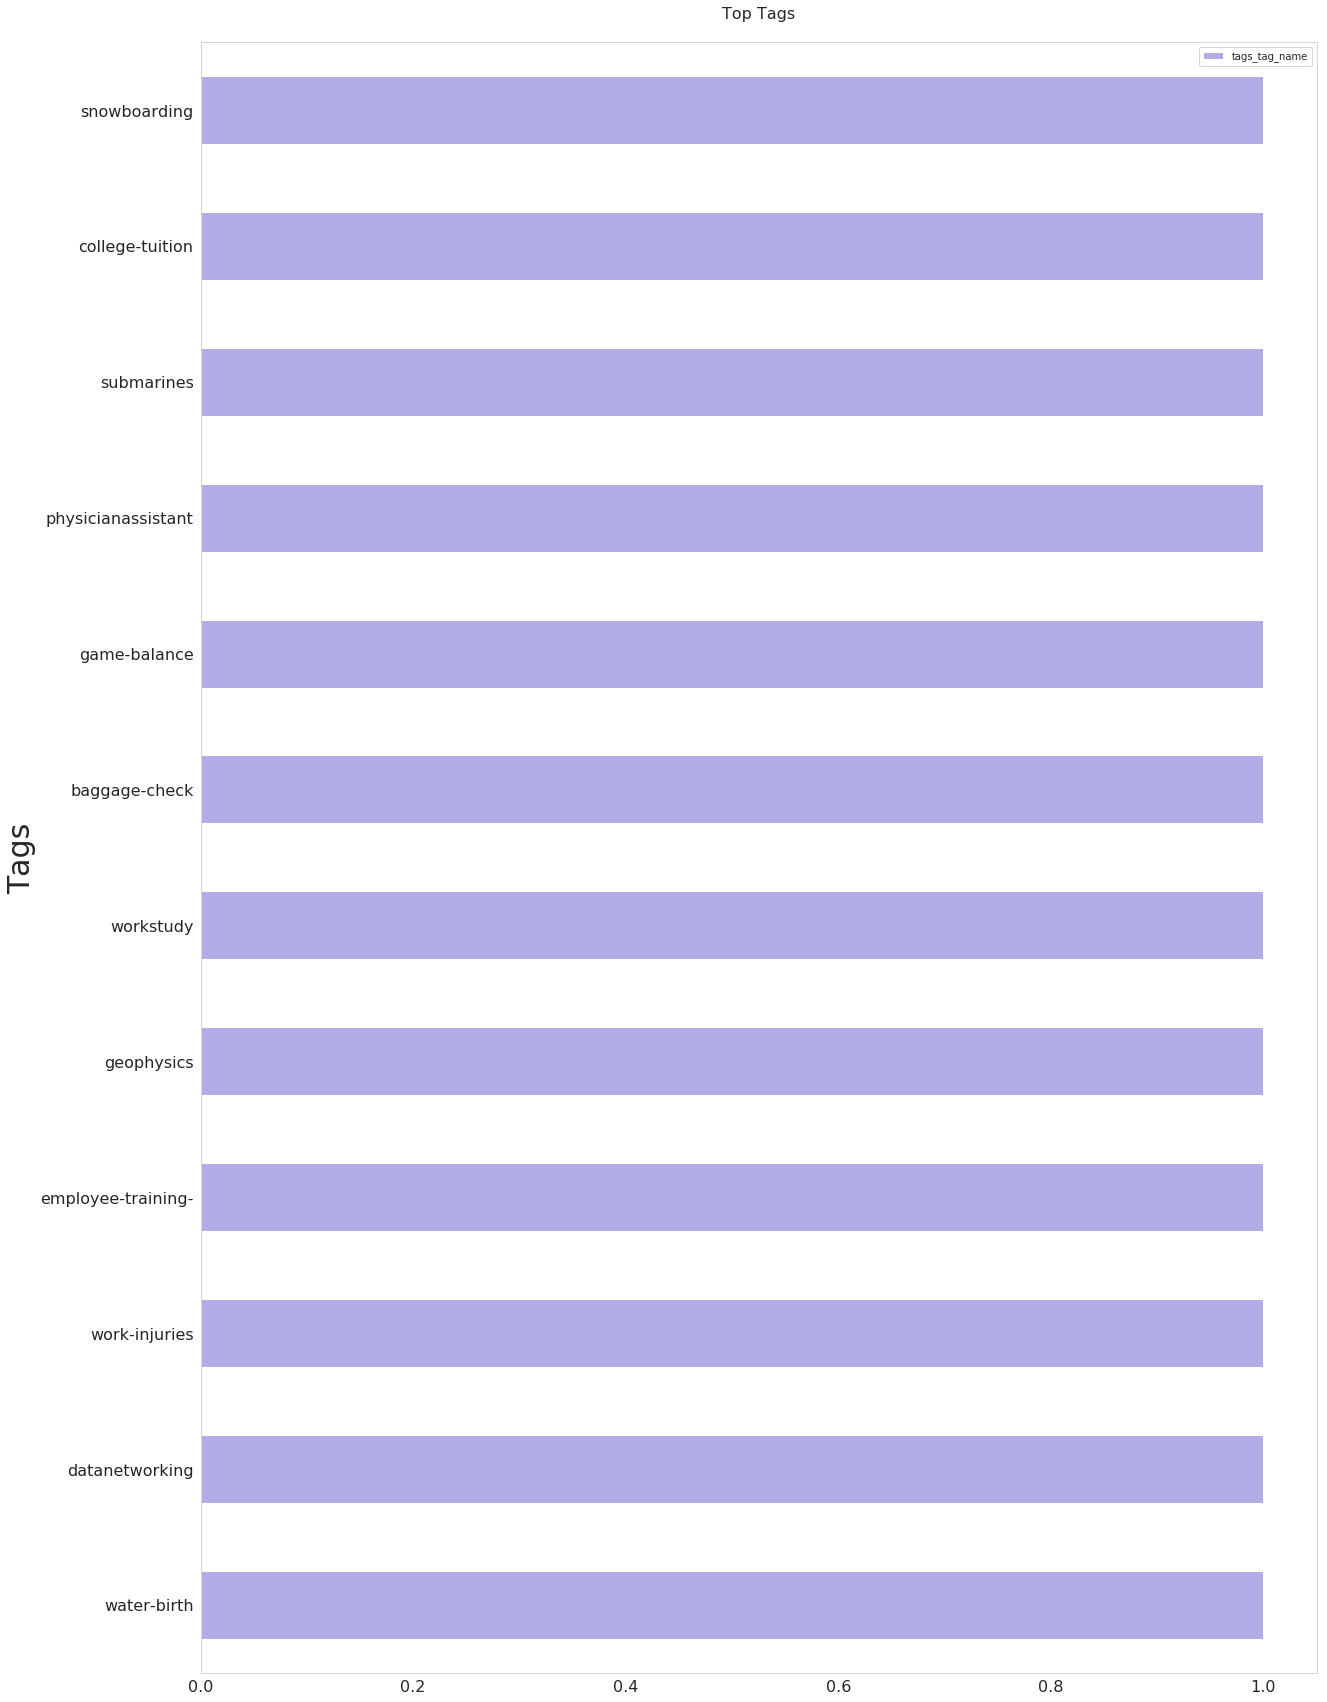

In [40]:
top_tag = tags.tags_tag_name.value_counts().head(12)
top_tag.plot.barh(figsize=(20,30),legend=True,fontsize='16', color=['#b2ade6'])
plt.title('Top Tags\n', fontsize='16')
plt.ylabel('Tags', fontsize='30')

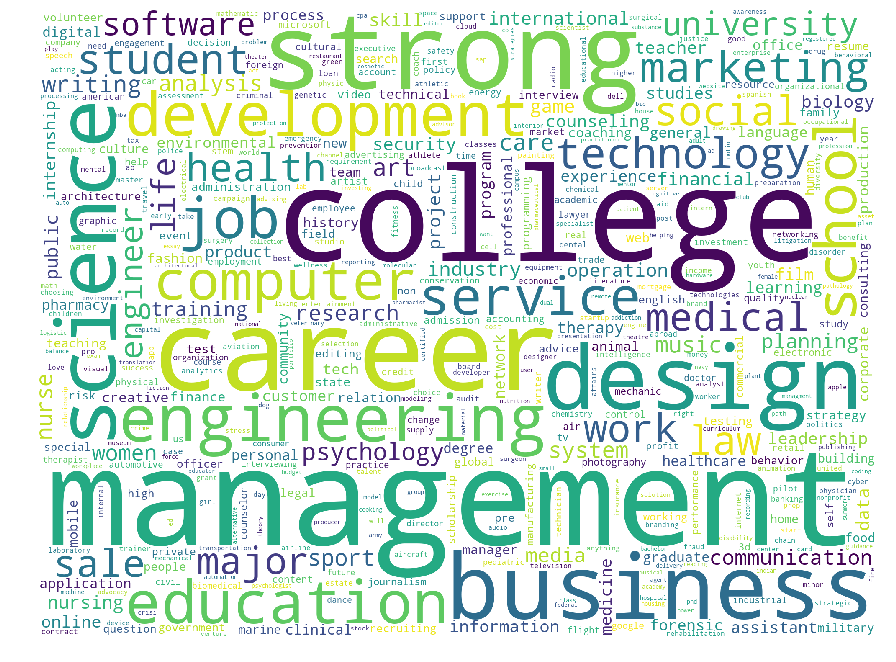

In [41]:
values = ','.join(str(v) for v in tags['tags_tag_name'])
wordcloud = WordCloud(stopwords=STOPWORDS,max_words=500,
                      background_color='white',min_font_size=6,
                      width=2000,collocations=False,
                      height=1500
                     ).generate(values)
plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

##Comments

In [42]:
extract_date(comments, 'comments_date_added')

In [43]:
commentyear  =  comments.year.unique()
commentrev = -np.sort(-commentyear)
commentrev

TOOLS = 'save,pan,box_zoom,reset,wheel_zoom,hover'
p = figure(title="Year-wise total number of Comment Count", y_axis_type="linear", plot_height = 400,
           tools = TOOLS, plot_width = 800)
p.xaxis.axis_label = 'Year'
p.yaxis.axis_label = 'Total Count'
p.line(commentrev, comments.year.value_counts() ,line_color="purple", line_width = 3)
p.select_one(HoverTool).tooltips = [
    ('year', '@x'),
    ('Number of Comment Count', '@y'),
]

output_file("line_chart.html", title="Line Chart")
show(p)

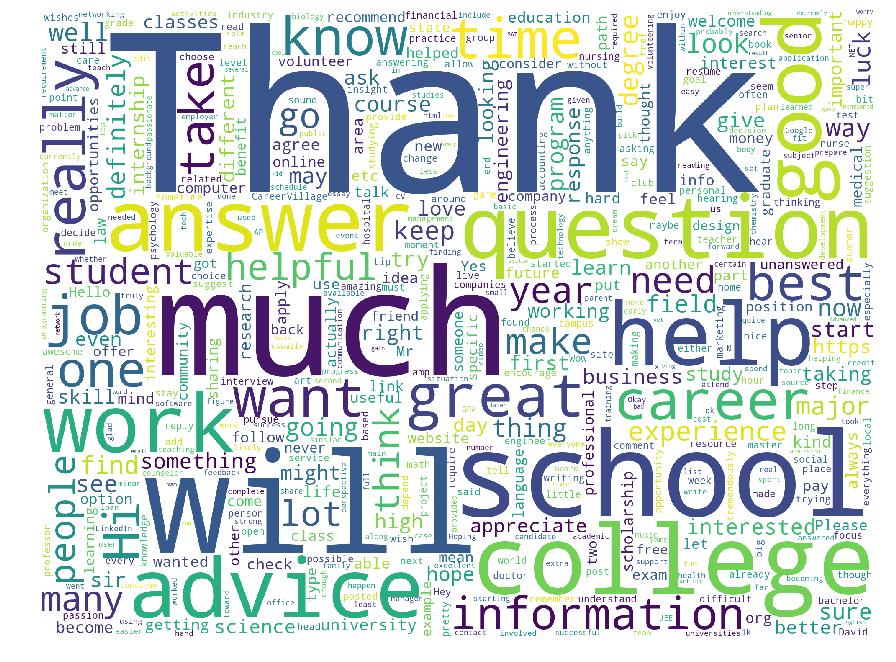

In [44]:
values = ','.join(str(v) for v in comments['comments_body'])
wordcloud = WordCloud(stopwords=STOPWORDS,max_words=500,
                      background_color='white',min_font_size=6,
                      width=2000,collocations=False,
                      height=1500
                     ).generate(values)
plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()